In [93]:
# Breanna Powell and Melody Behdarvandian
# CSS 576
# Assignment 3

# IDE: Visual Studio Code 
# Follow these steps if you have not used Jupyter Notebooks in VS Code before:
# https://code.visualstudio.com/docs/languages/python

# -------------------------------------------------------------------------------------------------
#                    FOLLOW THESE STEPS TO INSTALL TENSORFLOW in VS CODE
# -------------------------------------------------------------------------------------------------
# Open Anaconda Navigator 
# Launch VS Code through Anaconda Navigator
# Terminal > New Terminal
#
# https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/
# 1) Use the commands to create a tensorflow environment:
#    $ conda create -n tf tensorflow
#    $ conda activate tf
#
# https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_create-or-open-a-jupyter-notebook
# 2) In the upper right hand corner, switch the kernel from "base" over to "tf(Python 3.10.9)"
# This will change the kernel over to tensorflow's kernel.
#
# 3) Close this document and reopen it from Anaconda Navigator, but instead of "base" select "tf" from the dropdown menu
# If you don't see "tf" in the dropdown menu, try closing Anaconda Navigator and reopening it.
#
# 4) Install the following:
#    $ conda install ipykernel
#    $ conda install pandas matplotlib scikit-learn seaborn
#    $ conda install -c conda-forge tensorflow keras
# -------------------------------------------------------------------------------------------------

import numpy as np
import pandas as pd
import sys
import os

emailData = pd.read_csv('emails.csv')

# DATA EXPLORATION

In [94]:
emailData.shape # Check the size of the dataset

(5572, 5)

In [95]:
# Check to see if there are missing values (NaN or null)
emailData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   email       5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [96]:
emailData.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Check for Imbalanced Data

In [97]:
#Remove any all duplicates in emails data
emailData = emailData.drop_duplicates(subset=['email'])

In [98]:
# Check the ratio of ham to spam
emailData.groupby(['label']).count()

,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
label,,,,
ham,4516,39,9,5
spam,653,4,1,0


# PRE-PROCESSING TECHNIQUES

## Fix the Data Imbalance

In [99]:
# Replace labels with 0 for ham and 1 for spam
emailData["label"] = (emailData["label"] == "spam").astype(int)

# Check to make sure it worked
emailData.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [100]:
from sklearn.utils import shuffle

spamEmails = emailData[emailData["label"] == 1]
hamEmails = emailData[emailData["label"] == 0]


#hamEmails = shuffle(hamEmails).reset_index()
totalEmailsNeeded = len(spamEmails)-1

hamEmails = hamEmails.reset_index()
hamEmails = hamEmails.drop(["index"], axis=1)
hamEmails = hamEmails.loc[0:totalEmailsNeeded, :]
hamEmails

spamEmails = spamEmails.reset_index()
spamEmails = spamEmails.drop(["index"], axis=1)
spamEmails

emailDataBalanced = pd.concat([spamEmails,hamEmails], ignore_index=True)
emailDataBalanced

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
1,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
2,1,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
3,1,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
4,1,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN
...,...,...,...,...,...
1301,0,Thanks for picking up the trash.,NaN,NaN,NaN
1302,0,Why don't you go tell your friend you're not s...,NaN,NaN,NaN
1303,0,\Hi its Kate it was lovely to see you tonight ...,NaN,NaN,NaN
1304,0,Happy New year my dear brother. I really do mi...,NaN,NaN,NaN


In [101]:
# Separate the features (x) from the labels (y)
x = emailDataBalanced['email']
y = emailDataBalanced["label"]

## Feature Reduction

In [102]:
# Apply a count vectorizer to the training data to convert from text to token counts
# Count vectorizer -- will it ensure the testing data has no impact on the training data's normalization?
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents= "unicode", stop_words="english", max_features=40) # This cuts the features to 40 words
features = cv.fit_transform(x)
features.get_shape()

(1306, 40)

In [103]:
columns = cv.get_feature_names_out()

# Features is now in csr format (rather than a series or dataframe)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
type(features)
x = pd.DataFrame(features.toarray()) # convert it to an dataframe instead
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,...,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,0.049005,0.032925,0.035988,0.052833,0.073507,0.038285,0.040582,0.031394,0.035222,0.156202,...,0.034456,0.104900,0.045942,0.107198,0.045176,0.040582,0.044410,0.040582,0.051302,0.063553
std,0.215960,0.178509,0.198285,0.261669,0.272555,0.191957,0.197395,0.174446,0.200344,0.469886,...,0.230690,0.330596,0.220142,0.374465,0.211426,0.208716,0.230648,0.205012,0.220697,0.244048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,...,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000


In [104]:
# Checking to make sure that there are no NaN's
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
x.isna().sum().sum()

# Should print 0

0

In [105]:
x.columns = columns
#x = x.drop(["gt", "lt"], axis=1) # In the dataset we are using, &gt;  and &lt; are less than or greater than signs in html - not words
x.describe()

,150p,18,50,cash,claim,com,contact,customer,day,free,...,tone,txt,uk,ur,urgent,want,week,win,won,www
count,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,...,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,0.049005,0.032925,0.035988,0.052833,0.073507,0.038285,0.040582,0.031394,0.035222,0.156202,...,0.034456,0.104900,0.045942,0.107198,0.045176,0.040582,0.044410,0.040582,0.051302,0.063553
std,0.215960,0.178509,0.198285,0.261669,0.272555,0.191957,0.197395,0.174446,0.200344,0.469886,...,0.230690,0.330596,0.220142,0.374465,0.211426,0.208716,0.230648,0.205012,0.220697,0.244048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,...,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000


In [106]:
columns

array(['150p', '18', '50', 'cash', 'claim', 'com', 'contact', 'customer',
       'day', 'free', 'good', 'got', 'guaranteed', 'just', 'know', 'like',
       'min', 'mobile', 'msg', 'new', 'nokia', 'ok', 'phone', 'prize',
       'reply', 'send', 'service', 'stop', 'text', 'time', 'tone', 'txt',
       'uk', 'ur', 'urgent', 'want', 'week', 'win', 'won', 'www'],
      dtype=object)

In [107]:
x.max()

150p          1
18            1
50            2
cash          3
claim         2
com           1
contact       1
customer      1
day           3
free          3
good          2
got           2
guaranteed    1
just          3
know          2
like          3
min           3
mobile        3
msg           2
new           2
nokia         3
ok            2
phone         1
prize         2
reply         2
send          3
service       2
stop          3
text          3
time          2
tone          3
txt           3
uk            2
ur            3
urgent        2
want          2
week          2
win           2
won           1
www           1
dtype: int64

In [108]:
# ----- INITIAL FEATURE REDUCTION: THIS PART OF THE CODE MAY TAKE UP TO 30 MINUTES TO RUN ----
# maxIndex = len(x.columns)-1

# for i in range(maxIndex,0,-1):
    
#     if x[i].max() < 5.0:
#         x = x.drop(x.columns[i], 1)

# x = x.drop(x.columns[0], 1)

## Normalizing the Data

In [109]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
x = scaler.fit_transform(x)

In [110]:
#Mean Center data
x = x-np.mean(x,axis=0)


In [111]:
zVar = np.dot(x.T,x)
eigenvalues, eigenvectors = np.linalg.eig(zVar)

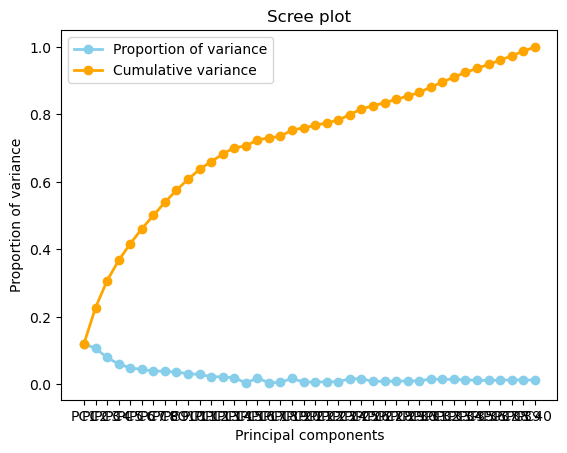

In [112]:
#1. Calculate the proportion of variance explained by each feature
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]

#2. Calculate the cumulative variance
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]


# Plot scree plot from PCA
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

In [113]:
display(prop_var)

[0.12050818063943378,
 0.10679808961970455,
 0.07976034723949588,
 0.06032980083621959,
 0.049127903986281925,
 0.04417354798304284,
 0.03977180585627102,
 0.03891119002338047,
 0.03627478761462761,
 0.031944309600446974,
 0.02936945324960347,
 0.023327221015778967,
 0.021687567936133613,
 0.019862192773322206,
 0.004356192688923201,
 0.018627959631037635,
 0.005070333415992428,
 0.005764131400270145,
 0.017921337239303968,
 0.006654556528643406,
 0.007193139579191938,
 0.00765360035250653,
 0.007745479902153433,
 0.016903659437351976,
 0.016617489583180624,
 0.00906854656688114,
 0.009287114601885964,
 0.009717284690119999,
 0.01003230521984439,
 0.010538464140559757,
 0.015688572929931532,
 0.015208448510708022,
 0.01467760752962849,
 0.014048959186956068,
 0.011779812610891744,
 0.01182185244678575,
 0.012369128702180878,
 0.01342499849016418,
 0.012947593634726442,
 0.013035032606437714]

In [114]:
u, s, vh = np.linalg.svd(x, full_matrices=True)

In [115]:
x

array([[-0.04900459, -0.03292496, -0.01799387, ...,  0.47970904,
        -0.05130168, -0.06355283],
       [-0.04900459, -0.03292496,  0.48200613, ..., -0.02029096,
        -0.05130168, -0.06355283],
       [-0.04900459, -0.03292496, -0.01799387, ..., -0.02029096,
        -0.05130168, -0.06355283],
       ...,
       [-0.04900459, -0.03292496, -0.01799387, ..., -0.02029096,
        -0.05130168, -0.06355283],
       [-0.04900459, -0.03292496, -0.01799387, ..., -0.02029096,
        -0.05130168, -0.06355283],
       [-0.04900459, -0.03292496, -0.01799387, ..., -0.02029096,
        -0.05130168, -0.06355283]])

In [116]:

x = pd.DataFrame(x)

In [117]:
x.columns = columns

In [118]:
nfeatures = len(x.columns);
nfeatures

40

In [119]:
Vsquare = [[0 for x in range(0,nfeatures)] for y in range(0,nfeatures)] 

for i in range(0,nfeatures):
    for j in range(0,nfeatures):
        Vsquare[i][j] = vh[i][j]**2
        if vh[i][j]<0:

            Vsquare[i][j] = Vsquare[i][j]*-1; 
        else:
            Vsquare[i][j] = Vsquare[i][j]*1; 
    

In [120]:
Vsquare

[[-0.0002879541882750199,
  -0.0006453629873742699,
  -2.4689236145492484e-05,
  -0.0013269658495119047,
  -0.06848457940957345,
  0.013711510825704662,
  -0.1677702742952151,
  -0.01531698009847039,
  0.00024256936570180945,
  0.0024533531299105907,
  -9.646304902019582e-08,
  9.941110548678866e-05,
  -0.16127202664704626,
  9.827922882706595e-06,
  8.160860815844175e-05,
  9.458202619302237e-05,
  -2.229185846271813e-06,
  -0.0004888620072836803,
  0.0007667555968971892,
  0.0010085135456070105,
  2.9046231375894224e-06,
  0.00019266441826023517,
  -4.81374845769504e-06,
  -0.11888964527841929,
  0.0013374290017886309,
  0.0002289222961223409,
  -0.0016891629636924558,
  0.0007329780281259151,
  0.0012105644583285612,
  -0.0001791278184181145,
  0.0004567333682836196,
  0.001090794886550742,
  0.0017951505205948566,
  0.00041148037303351406,
  -0.024771595584213196,
  0.0005769925829849331,
  0.0009657351271472932,
  -7.321041889192525e-07,
  -0.38489979118425405,
  0.026474629139664

## Feature importance with PCA

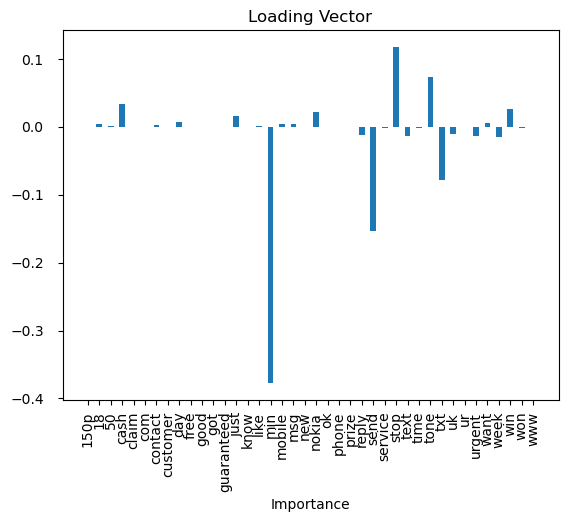

In [121]:
from matplotlib.pyplot import bar, grid, title, xlabel, ylabel


# bar(columns, Vsquare[:][38], 0.5); # CHANGED FROM 1.5 TO 1.0
    
# grid; 
    
    
# xlabel('Feature index')
    
# ylabel('Importance of feature')
    

    
# title("Loading Vector")

y_pos = np.arange(len(columns))
fig, ax = plt.subplots()

ax.bar(columns, Vsquare[:][38], 0.5, linewidth = 1000)
ax.set_xticks(columns)
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.set_xticklabels(columns, rotation=90)
ax.set_xlabel('Importance')
ax.set_title('Loading Vector')

plt.show() 

In [122]:
#LOADING VECTOR 1 TOP 5
#display(columns[38],columns[6],columns[12], columns[23], columns[24])

#LOADING VECTOR 2 TOP 5
#display(columns[39],columns[5],columns[0], columns[12], columns[31])

#LOADING VECTOR 3 TOP 5
#display(columns[33],columns[23],columns[31], columns[4], columns[9])

#LOADING VECTOR 40 TOP 5
display(columns[30],columns[23],columns[39], columns[24], columns[26])

'tone'

'prize'

'www'

'reply'

'service'

In [123]:
x.describe()

,150p,18,50,cash,claim,com,contact,customer,day,free,...,tone,txt,uk,ur,urgent,want,week,win,won,www
count,1.306000e+03,1.306000e+03,1.306000e+03,1.306000e+03,1.306000e+03,1.306000e+03,1306.000000,1.306000e+03,1.306000e+03,1.306000e+03,...,1.306000e+03,1.306000e+03,1.306000e+03,1.306000e+03,1.306000e+03,1.306000e+03,1.306000e+03,1.306000e+03,1.306000e+03,1.306000e+03
mean,-1.632181e-17,2.720301e-18,-2.720301e-18,1.088121e-17,-1.088121e-17,8.160904e-18,0.000000,8.160904e-18,-5.100565e-18,2.720301e-18,...,-5.440603e-18,-2.176241e-17,-1.360151e-18,-3.536392e-17,5.440603e-18,-1.020113e-18,-2.720301e-18,-2.720301e-18,5.440603e-18,-5.440603e-18
std,2.159603e-01,1.785086e-01,9.914247e-02,8.722315e-02,1.362774e-01,1.919566e-01,0.197395,1.744457e-01,6.678137e-02,1.566287e-01,...,7.689674e-02,1.101988e-01,1.100709e-01,1.248217e-01,1.057129e-01,1.043582e-01,1.153241e-01,1.025061e-01,2.206969e-01,2.440481e-01
min,-4.900459e-02,-3.292496e-02,-1.799387e-02,-1.761103e-02,-3.675345e-02,-3.828484e-02,-0.040582,-3.139357e-02,-1.174068e-02,-5.206738e-02,...,-1.148545e-02,-3.496682e-02,-2.297090e-02,-3.573252e-02,-2.258806e-02,-2.029096e-02,-2.220521e-02,-2.029096e-02,-5.130168e-02,-6.355283e-02
25%,-4.900459e-02,-3.292496e-02,-1.799387e-02,-1.761103e-02,-3.675345e-02,-3.828484e-02,-0.040582,-3.139357e-02,-1.174068e-02,-5.206738e-02,...,-1.148545e-02,-3.496682e-02,-2.297090e-02,-3.573252e-02,-2.258806e-02,-2.029096e-02,-2.220521e-02,-2.029096e-02,-5.130168e-02,-6.355283e-02
50%,-4.900459e-02,-3.292496e-02,-1.799387e-02,-1.761103e-02,-3.675345e-02,-3.828484e-02,-0.040582,-3.139357e-02,-1.174068e-02,-5.206738e-02,...,-1.148545e-02,-3.496682e-02,-2.297090e-02,-3.573252e-02,-2.258806e-02,-2.029096e-02,-2.220521e-02,-2.029096e-02,-5.130168e-02,-6.355283e-02
75%,-4.900459e-02,-3.292496e-02,-1.799387e-02,-1.761103e-02,-3.675345e-02,-3.828484e-02,-0.040582,-3.139357e-02,-1.174068e-02,-5.206738e-02,...,-1.148545e-02,-3.496682e-02,-2.297090e-02,-3.573252e-02,-2.258806e-02,-2.029096e-02,-2.220521e-02,-2.029096e-02,-5.130168e-02,-6.355283e-02
max,9.509954e-01,9.670750e-01,9.820061e-01,9.823890e-01,9.632466e-01,9.617152e-01,0.959418,9.686064e-01,9.882593e-01,9.479326e-01,...,9.885145e-01,9.650332e-01,9.770291e-01,9.642675e-01,9.774119e-01,9.797090e-01,9.777948e-01,9.797090e-01,9.486983e-01,9.364472e-01


# Split into Train and Test

In [124]:
# Split into training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [125]:
x_train.shape

(1044, 40)

In [126]:
len(x_train)

1044

In [127]:
len(y_train)

1044

# Neural Network

In [128]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

train_shape = x_train.shape
b = train_shape[1]
input_shape = (b,)

print(input_shape)

(40,)


In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# https://keras.io/api/models/sequential/


# Activation function options:
# - relu
# - sigmoid - good for last layer of binary classification
# - elu - need to research this one

model = Sequential()
model.add(Dense(8, input_shape = input_shape, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid')) # Always use a sigmoid function for final layer when performing binary classification.

In [130]:
# https://keras.io/api/callbacks/early_stopping/
# https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/
# Monitor =
#  - loss
#  - accuracy
#  - val_loss (val_loss only applies if we use the validation data in the model.fit function)
#  - val_binary_crossentropy (val stands for "validation" -- as in validation set)
#  - precision_metric
#  - prec (BAD!!!!)

# Mode =
#  - min
#  - max

# min_delta = 
#  - 0.0001

# https://lambdalabs.com/blog/tensorflow-2-0-tutorial-04-early-stopping
# callback = keras.callbacks.EarlyStopping(monitor='prec', min_delta=0.0001,patience=1) #TERRIBLE
# callback = keras.callbacks.EarlyStopping(monitor='precision_metric', min_delta=0.0001,patience=1) # error
# callback = keras.callbacks.EarlyStopping(monitor='precision_metric', patience=3, mode=max) # error
# callback = keras.callbacks.EarlyStopping(monitor='precision_metric', patience=3) # error
# callback = keras.callbacks.EarlyStopping(monitor='auc', patience=3) # doesn't work
# callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3) # BAD
# callback = keras.callbacks.EarlyStopping(monitor='mse', min_delta=0.0001, patience=3) # BAD
# callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3) # monitors loss if the performance goes down
# callback = keras.callbacks.EarlyStopping(monitor='precision_metric', mode="min", patience=5, restore_best_weights=True)
# callback = keras.callbacks.EarlyStopping(monitor='loss', mode="min", patience=5, restore_best_weights=True) # Works well for loss
# callback = keras.callbacks.EarlyStopping(monitor='precision_metric', mode="max", patience=5, restore_best_weights=True) # Works well
# start_from_epoch?
# callback = keras.callbacks.EarlyStopping(monitor='precision_metric', min_delta = 0.0001, mode="auto", patience=3, restore_best_weights=True) # Works well

# callback = keras.callbacks.EarlyStopping(
#     monitor='precision_metric', baseline = 0.99,
#     min_delta = 0.0001, mode="auto", patience=3, restore_best_weights=True) 

# ACTUALLY STOPS
# callback = keras.callbacks.EarlyStopping(
#     monitor='precision', baseline = 0.95,
#     min_delta = 0.001, mode="max", patience=3, restore_best_weights=True) # Works well

callback1 = keras.callbacks.EarlyStopping(monitor='loss', verbose = 1, min_delta = 0.001,
                                          mode="min", patience=5, restore_best_weights=True) # Works well for loss

callback2 = keras.callbacks.EarlyStopping(
    monitor='precision', verbose = 1, baseline = 0.90,
    min_delta = 0.001, mode="auto", patience=3, restore_best_weights=True) # Works well

In [131]:
model.summary() #This tells us what was in this network

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 328       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [132]:
# https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/
epochs = 500

In [133]:
# https://keras.io/api/metrics/classification_metrics/#precision-class
# Optimizer options:
# - sgd (stochastic gradient descent)
# - adam?
# - rmsprop?

# https://keras.io/api/losses/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses 
# Loss parameter options: 
# - binary_crossentropy https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class
# - mse 

# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# metrics can be a list, like this: metrics=["mae", "acc"]
# Metrics parameter options:
# - accuracy
# - precision https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision
# - recall

# TO DO: decide if we should use any optimizers (rmsprop, adam, sgd, adagrad, adadelta)
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop

# https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision
# https://keras.io/api/metrics/classification_metrics/#precision-class

# OPTIMIZING FOR PRECISION
# Attempt 1:
# Note: With a loss function using from_logits=True, thresholds must be 0
# model.compile(optimizer='adam',
#               loss=keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=[keras.metrics.Precision(thresholds=0)]) 
# Attempt 2:
# model.compile(optimizer='sgd',
#               loss='mse',
#               metrics=[keras.metrics.Precision(),
#                         keras.metrics.FalseNegatives(),
#                         keras.metrics.TrueNegatives(),
#                         keras.metrics.FalsePositives(),
#                         keras.metrics.TruePositives()
#                        ]
#                )

# OPTIMIZING FOR AUC
# model.compile(optimizer='sgd',
#               loss=keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=[keras.metrics.AUC(from_logits=True)])

#model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback1, callback2])

In [134]:
def hyperparameterSearchWithDoc():
    file = open('output.txt', 'a')
    sys.stdout = file

    optArray = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta']
    lossArray = ['binary_crossentropy', 'mse', 'mae','hinge', 'huber']

    for j in range(0, len(optArray)):
        for k in range(0, len(lossArray)):
            model.compile(optimizer=optArray[j],
                loss=lossArray[k],
                metrics=[keras.metrics.Precision(),
                            keras.metrics.FalseNegatives(),
                            keras.metrics.TrueNegatives(),
                            keras.metrics.FalsePositives(),
                            keras.metrics.TruePositives()
                        ]
                )
       
            print(optArray[j], lossArray[k])
            model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback1, callback2])

            score = model.evaluate(x_test, y_test, verbose=0)
            print("Test loss:", score[0])
            print("Test precision:", score[1])
            print("Test False Negatives:", score[2])
            print("Test True Negatives:", score[3])
            print("Test False Positives:", score[4])
            print("Test True Positives:", score[5])

            file.flush()
            os.fsync(file.fileno())
            file.close()

In [135]:
def hyperparameterSearch():
    
    bestPrecision = 0
    bestOpt = ''
    bestLoss = ''

    optArray = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta']
    lossArray = ['binary_crossentropy', 'mse', 'mae','hinge', 'huber']

    for j in range(0, len(optArray)):
        for k in range(0, len(lossArray)):
            model.compile(optimizer=optArray[j],
                loss=lossArray[k],
                metrics=[keras.metrics.Precision(),
                            keras.metrics.FalseNegatives(),
                            keras.metrics.TrueNegatives(),
                            keras.metrics.FalsePositives(),
                            keras.metrics.TruePositives()
                        ]
                )
       
            print(optArray[j], lossArray[k])
            model.fit(x = x_train, y = y_train, epochs=epochs, callbacks=[callback1, callback2])

            score = model.evaluate(x_test, y_test, verbose=0)
            # print("Test loss:", score[0])
            # print("Test precision:", score[1])
            # print("Test False Negatives:", score[2])
            # print("Test True Negatives:", score[3])
            # print("Test False Positives:", score[4])
            # print("Test True Positives:", score[5])

            if score[1] > bestPrecision:
                bestOpt = optArray[j]
                bestLoss = lossArray[k]
                bestPrecision = score[1]
    
    return bestOpt, bestLoss, bestPrecision

In [148]:
bestOpt, bestLoss, bestPrecision = hyperparameterSearch()

sgd binary_crossentropy
Epoch 1/500
33/33 [==============================] - 1s 2ms/step - loss: 0.2160 - precision_235: 0.9644 - false_negatives_235: 58.0000 - true_negatives_235: 509.0000 - false_positives_235: 17.0000 - true_positives_235: 460.0000
Epoch 2/500
33/33 [==============================] - 0s 2ms/step - loss: 0.2099 - precision_235: 0.9586 - false_negatives_235: 55.0000 - true_negatives_235: 506.0000 - false_positives_235: 20.0000 - true_positives_235: 463.0000
Epoch 3/500
33/33 [==============================] - 0s 2ms/step - loss: 0.2031 - precision_235: 0.9564 - false_negatives_235: 57.0000 - true_negatives_235: 505.0000 - false_positives_235: 21.0000 - true_positives_235: 461.0000
Epoch 4/500
33/33 [==============================] - 0s 2ms/step - loss: 0.2036 - precision_235: 0.9506 - false_negatives_235: 56.0000 - true_negatives_235: 502.0000 - false_positives_235: 24.0000 - true_positives_235: 462.0000
Epoch 5/500
33/33 [==============================] - 0s 2ms/step

In [149]:
display(bestOpt, bestLoss, bestPrecision)

'adagrad'

'mae'

0.9741379022598267

# Metrics - compared with Testing Set

In [ ]:
# score = model.evaluate(x_test, y_test, verbose=0)
# print("Test loss:", score[0])
# print("Test precision:", score[1])
# print("Test False Negatives:", score[2])
# print("Test True Negatives:", score[3])
# print("Test False Positives:", score[4])
# print("Test True Positives:", score[5])

In [ ]:
# I wonder about this metric? -- it uses spam and ham in the example!
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss

# Saving the Model

In [ ]:
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/
import os

# HOW TO SAVE A MODEL
if score[1] > 0.9:
    model_json = model.to_json() # Convert the model to a json format
    with open("model2.json", "w") as json_file: 
        json_file.write(model_json) # Save the model
    model.save_weights("model2.h5") # Save the weights
    print("Saved model to disk")

# HOW TO LOAD A MODEL:
# from tensorflow.keras.models import model_from_json
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

# Visual

In [ ]:
# https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (model.predict(x_test) > 0.5).astype("int32")
y_pred
cf_matrix = confusion_matrix(y_test, y_pred)




ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Precision: %.6f' % precision_score(y_test, y_pred, zero_division=1))
print('Recall = %.6f' % recall_score(y_test, y_pred, zero_division=1))
print('F-Score = %.6f' % f1_score(y_test, y_pred, zero_division=1))

# Clustering Techniques

## DBSCAN

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
#------------------------------DBSCAN ------------------------------------
x = StandardScaler().fit_transform(x)

plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [ ]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
import numpy as np
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

neigh = NearestNeighbors(n_neighbors=2) # Computes the distances to all neighbors to help find the ideal eps value
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.ylabel("epsilon values")
plt.plot(distances)

# The ideal value for epsilon will be near the elbow of this graph
# I will choose to search for values between 100 and 200 to find a good epsilon in the next code section

In [ ]:
# NOTE: TAKES ABOUT A MINUTE TO RUN

from sklearn.cluster import DBSCAN
from sklearn import metrics
def find_ideal_eps_and_samples_for_2_clusters():
    # eps = [100, 125, 150, 200] # Before feature reduction
    # eps = [1, 2, 3, 4, 5, 6, 7, 9, 10]
    eps = [1, 2, 3, 4, 5, 6]
    min_samples = [3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]
    for i in eps:
        for j in min_samples:
            db = DBSCAN(eps=i, min_samples=j).fit(x)
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters_ == 2:
                print("The ideal eps is: %d" % i)
                print("The ideal min_samples is: %d" % j)
                return db

# Print out the ideal value for eps and for min_samples parameters:
db = find_ideal_eps_and_samples_for_2_clusters()

In [ ]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [ ]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, labels):.3f}")

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.ylabel("")
plt.show()